## Case Study on ANOVA

#### XYZ Company has offices in four different zones. The company wishes to investigate the following :
1.  The mean sales generated by each zone.
2.  Total sales generated by all the zones for each month.
3.  Check whether all the zones generate the same amount of sales.
 


In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read the dataset to python

In [2]:
salesData = pd.read_csv("sales_data_zone_wise.csv")
salesData.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


## Understand the dataset

In [3]:
salesData.shape

(29, 5)

In [4]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
# checking for null values
salesData.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [6]:
salesData.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


### Inference
1. The dataset contains a total of 29 entries.
2. Dataset contains no null values.
3. Average sales in Zone-D is higher than the other Zones.
4. The least sale is in Zone-A

## 1.The mean sales generated by each zone.

In [7]:
salesData.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

### Insights

1. The average sales generated by zones A,B,C,D is 1540493,1755560,1772871 and 1842927 respectively.
2. The average sales in Zone-D is higher than the other Zones.
3. The least sale is in Zone-A

## 2.Total sales generated by all the zones for each month.

In [8]:
zones=pd.DataFrame({'A':salesData['Zone - A'],'B':salesData['Zone - B'],'C':salesData['Zone - C'],'D':salesData['Zone - D']})
sum = zones.sum(axis=1)
month_sales = pd.DataFrame({"Month":salesData['Month'],"total_sale":sum})
month_sales

,Month,total_sale
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


### Insight

1. Total sales generated by all the zones is higher in the month 4.
2. Total sales generated by all the zones is least in the month 13.

## 3.Check whether all the zones generate the same amount of sales.

In [9]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:949: Matplo

Text(0.5, 0, 'Mode')

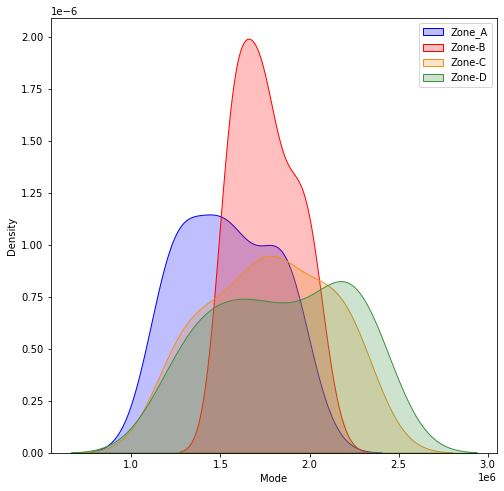

In [10]:
## kde graph
plt.figure(figsize=(8,8))
sns.kdeplot(salesData['Zone - A'], color='b', shade=True, Label='Zone_A')
sns.kdeplot(salesData['Zone - B'], color='r', shade=True, Label='Zone-B')
sns.kdeplot(salesData['Zone - C'], color='#ED9121', shade=True, Label='Zone-C')
sns.kdeplot(salesData['Zone - D'], color='#3D9140', shade=True,Label='Zone-D')
plt.legend()
plt.xlabel('Mode')

### Null hypothesis : Zones A,B,C and D generate same amount of sales.
### Alternative hypothesis : Zones A,B,C and D generate different amount of sales.
### Alpha = 0.05

In [11]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [16]:
fvalue,pvalue=stats.f_oneway(salesData['Zone - A'],salesData['Zone - B'],salesData['Zone - C'],salesData['Zone - D'])
print('f value =',fvalue)
print('p values =',pvalue)

f value = 5.672056106843581
p values = 0.0011827601694503335


* Here the P-value is 0.00118 which is lower than the significance level 0.05 so we reject the null hypothesis and accept alternative hypothesis.
* i.e, All the zones generate different amount of sales.